Graph saved as 'benchmark_graph.png'. Opening plot window...


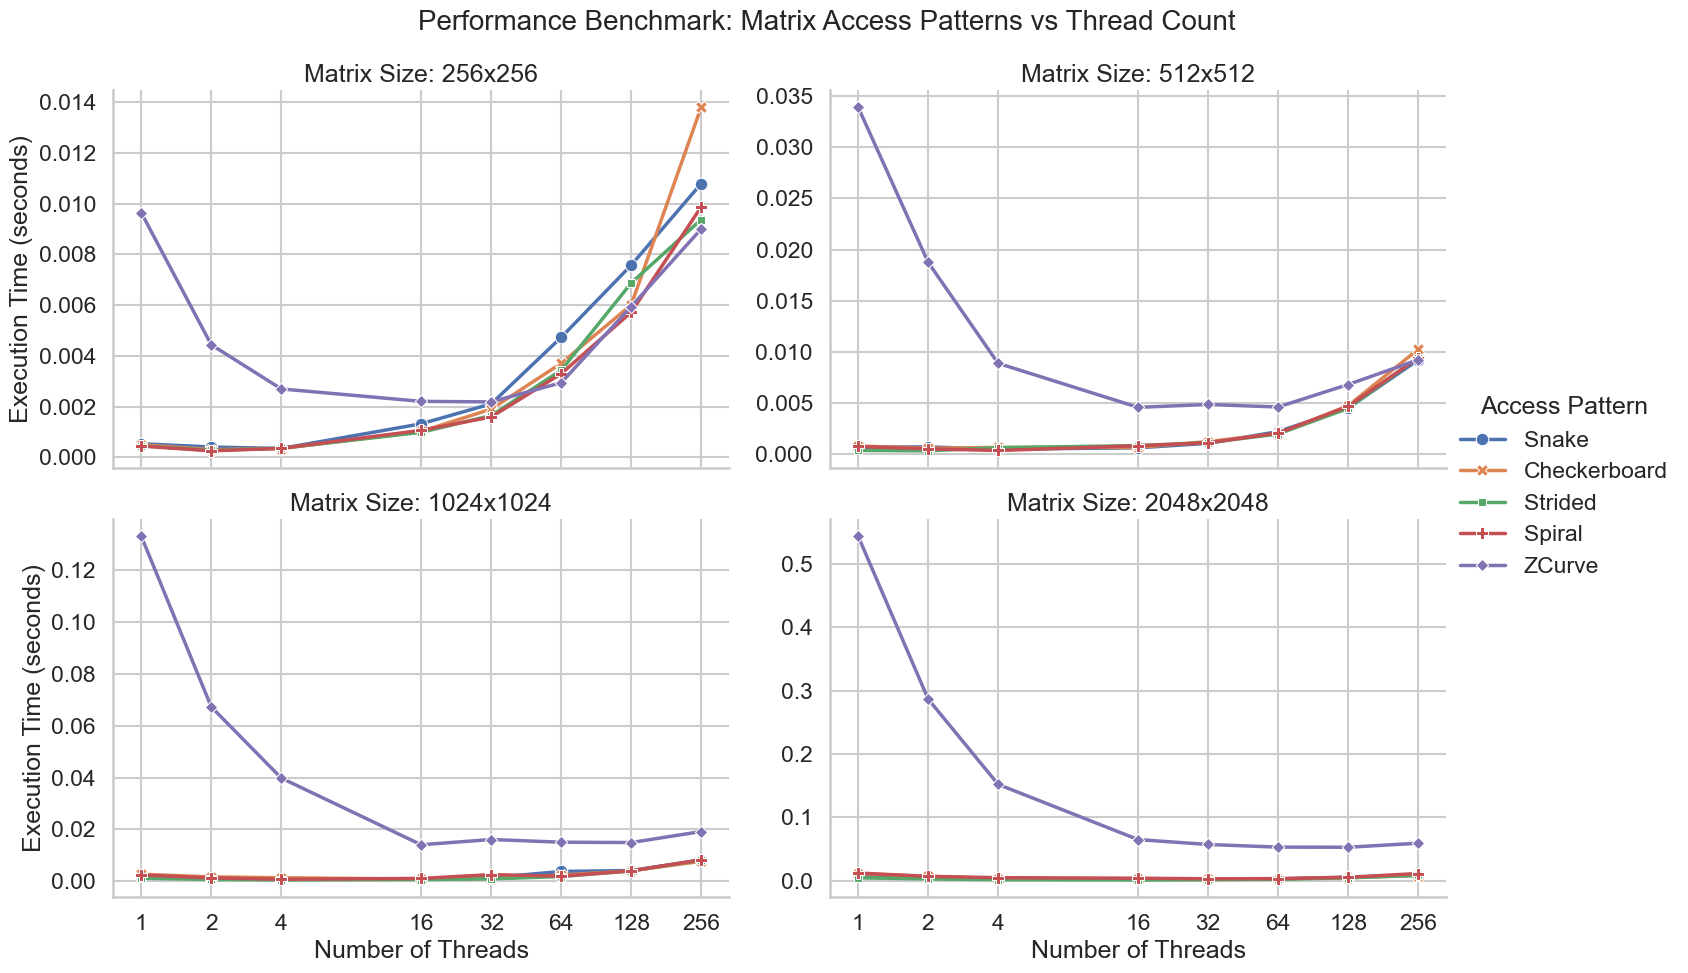

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the filename
csv_file =r"C:\Users\HARSH RAJPUT\benchmark_results.csv"

# Check if file exists
if not os.path.exists(csv_file):
    print(f"Error: {csv_file} not found. Please run the C++ code first.")
    exit()

# 1. Load Data
try:
    df = pd.read_csv(csv_file)
except Exception as e:
    print(f"Error reading CSV: {e}")
    exit()

# 2. Setup the Plotting Theme
sns.set_theme(style="whitegrid", context="talk")

# 3. Create a FacetGrid (Multiple subplots)
# - One chart for each Matrix Size (col="MatrixSize")
# - Wrap to 2 columns (col_wrap=2)
# - Sharey=False lets each chart have its own vertical scale (important because 2048 is much slower than 256)
g = sns.FacetGrid(df, col="MatrixSize", col_wrap=2, height=5, aspect=1.5, sharey=False)

# 4. Map the data to Line Plots
g.map_dataframe(sns.lineplot, x="Threads", y="TimeSeconds", hue="Method", style="Method", markers=True, dashes=False, linewidth=2.5)

# 5. Customize Axes
g.add_legend(title="Access Pattern")
g.set_axis_labels("Number of Threads", "Execution Time (seconds)")
g.set_titles("Matrix Size: {col_name}x{col_name}")

# Log scale for X-axis helps visualize 1, 2, 4... 256 better
for ax in g.axes.flat:
    ax.set_xscale('log', base=2)
    ax.set_xticks([1, 2, 4, 16, 32, 64, 128, 256])
    ax.set_xticklabels([1, 2, 4, 16, 32, 64, 128, 256])

# 6. Title and Save
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Performance Benchmark: Matrix Access Patterns vs Thread Count', fontsize=20)

output_img = "benchmark_graph.png"
plt.savefig(output_img)
print(f"Graph saved as '{output_img}'. Opening plot window...")

plt.show()